### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("resources/charity_data.csv")
application_df.head()

In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df_clean = application_df.drop(['EIN','NAME'], axis=1)  # axis=1 means drop the columns
df_clean.head()
df_original = df_clean.copy()

In [ ]:
# Determine the number of unique values in each column.
df_clean.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [ ]:
# Look at APPLICATION_TYPE value counts for binning
df_clean['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

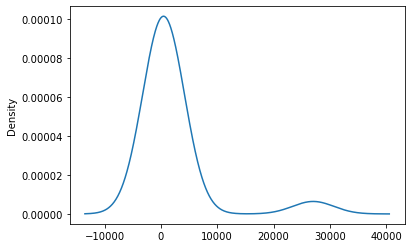

In [ ]:
# Visualize the value counts of APPLICATION_TYPE
df_clean['APPLICATION_TYPE'].value_counts().plot.density()

In [ ]:
# Determine which values to replace if counts are less than 10
replace_application_indicator = df_clean['APPLICATION_TYPE'].value_counts() < 1000
# switch the index with values 
replaced_application = pd.Series(replace_application_indicator.index.values, index=replace_application_indicator )
# select only values that are less than 10 (aka true values)
replaced_application = replaced_application[replaced_application.index.values == True]
#print(replaced_application)
# Replace in dataframe
for app in replaced_application:
    df_clean.APPLICATION_TYPE = df_clean.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
df_clean.APPLICATION_TYPE.value_counts()
#print(application_df['APPLICATION_TYPE']!='Other')
#application_df.tail()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Look at CLASSIFICATION value counts for binning
df_clean['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [ ]:
# Determine which values to replace if counts are less than 10
replace_class_indicator = df_clean['CLASSIFICATION'].value_counts() < 1000
# switch the index with values 
replace_class = pd.Series(replace_class_indicator.index.values, index=replace_class_indicator )
# select only values that are less than 10 (aka true values)
replace_class = replace_class[replace_class.index.values == True]

# Replace in dataframe
for cls in replace_class:
    df_clean.CLASSIFICATION = df_clean.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
df_clean.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Generate our categorical variable lists
application_cat = df_clean.select_dtypes(include=['object']).columns.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [ ]:
df_clean[application_cat].nunique()

APPLICATION_TYPE          6
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [ ]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_clean[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Merge one-hot encoded features and drop the originals
df_application = df_clean.merge(encode_df, left_index=True, right_index=True)
df_application.drop(application_cat, 1, inplace=True)
df_application.head()

<ipython-input-127-024d8c5d6c36>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_application.drop(application_cat, 1, inplace=True)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Split our preprocessed data into our features and target arrays
y = df_application["IS_SUCCESSFUL"].values
X = df_application.drop(["IS_SUCCESSFUL"], axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, test_size=0.2)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
X.head()

,STATUS,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 1st attempt to optimize: optimize the Model - Target Accuracy better than 72%

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
no_of_features = len(X_train_scaled[0])
no_of_nodes_layer1 = int(no_of_features * 0.50)
no_of_nodes_layer2 = int(no_of_features * 0.25)
no_of_output_nodes = 1

### print all the layers input
print(no_of_features)
print(no_of_nodes_layer1)

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=no_of_nodes_layer1, activation='relu', input_dim=no_of_features))

# 2 hidden layer
nn.add(tf.keras.layers.Dense(units=no_of_nodes_layer2, activation='relu', input_dim=no_of_features))

# Output layer
nn.add(tf.keras.layers.Dense(units=no_of_output_nodes, activation='sigmoid'))

# Check the structure of the model
nn.summary()

40
20
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 20)                820       
                                                                 
 dense_22 (Dense)            (None, 10)                210       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("AlphabetSoupCharity_Optimization_1.h5", verbose=1, save_weights_only=True, save_freq=5)

In [ ]:
# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model = nn.fit(X_train_scaled, y_train, epochs=100,verbose=1,callbacks=[checkpoint])

Epoch 1/100
  1/858 [..............................] - ETA: 4:24 - loss: 0.8290 - accuracy: 0.5000
Epoch 1: saving model to AlphabetSoupCharity_Optimization_1.h5
  5/858 [..............................] - ETA: 15s - loss: 0.7389 - accuracy: 0.5188 
Epoch 1: saving model to AlphabetSoupCharity_Optimization_1.h5
 10/858 [..............................] - ETA: 12s - loss: 0.7236 - accuracy: 0.5219
Epoch 1: saving model to AlphabetSoupCharity_Optimization_1.h5

Epoch 1: saving model to AlphabetSoupCharity_Optimization_1.h5

Epoch 1: saving model to AlphabetSoupCharity_Optimization_1.h5
 25/858 [..............................] - ETA: 6s - loss: 0.7180 - accuracy: 0.5475 
Epoch 1: saving model to AlphabetSoupCharity_Optimization_1.h5

Epoch 1: saving model to AlphabetSoupCharity_Optimization_1.h5

Epoch 1: saving model to AlphabetSoupCharity_Optimization_1.h5
 43/858 [>.............................] - ETA: 4s - loss: 0.6992 - accuracy: 0.5669
Epoch 1: saving model to AlphabetSoupCharity_Opti

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=1)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 [==============================] - 0s 610us/step - loss: 0.5447 - accuracy: 0.7385
Loss: 0.5446544289588928, Accuracy: 0.7384839653968811


##### 2nd attempt ####

In [ ]:
# Generate our categorical variable lists
df_orig_iter2 = df_original.copy()
application_cat_iter2 = df_orig_iter2.select_dtypes(include=['object']).columns.tolist()
application_cat_iter2

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [ ]:
# Determine which values to replace if counts are less than 10
replace_application_indicator = df_orig_iter2['APPLICATION_TYPE'].value_counts() < 1000
# switch the index with values 
replaced_application = pd.Series(replace_application_indicator.index.values, index=replace_application_indicator )
# select only values that are less than 10 (aka true values)
replaced_application = replaced_application[replaced_application.index.values == True]
#print(replaced_application)
# Replace in dataframe
for app in replaced_application:
    df_orig_iter2.APPLICATION_TYPE = df_orig_iter2.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
df_orig_iter2.APPLICATION_TYPE.value_counts()
#print(application_df['APPLICATION_TYPE']!='Other')

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Determine which values to replace if counts are less than 10
replace_class_indicator = df_orig_iter2['CLASSIFICATION'].value_counts() < 1000
# switch the index with values 
replace_class = pd.Series(replace_class_indicator.index.values, index=replace_class_indicator )
# select only values that are less than 10 (aka true values)
replace_class = replace_class[replace_class.index.values == True]

# Replace in dataframe
for cls in replace_class:
    df_orig_iter2.CLASSIFICATION = df_orig_iter2.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
df_orig_iter2.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [ ]:
application_cat_iter2.remove('INCOME_AMT')
df_orig_iter2.drop(['INCOME_AMT'], axis=1, inplace=True)

In [ ]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_orig_iter2[application_cat_iter2]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat_iter2)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
df_orig_iter2[application_cat_iter2].nunique()

APPLICATION_TYPE          6
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [ ]:
# Merge one-hot encoded features and drop the originals
df_application_iter2 = df_orig_iter2.merge(encode_df, left_index=True, right_index=True)
df_application_iter2.drop(application_cat_iter2, 1, inplace=True)
#df_application_iter1.head()
application_cat

<ipython-input-93-dab63d8ddcde>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_application_iter2.drop(application_cat_iter2, 1, inplace=True)


['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [ ]:
df_application_iter2.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust',
       'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y'],
      dtype='object')

In [ ]:
# Split our preprocessed data into our features and target arrays
y2 = df_application_iter2["IS_SUCCESSFUL"].values
X2 = df_application_iter2.drop(["IS_SUCCESSFUL"], axis=1)

# Split the preprocessed data into a training and testing dataset
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, random_state=50, test_size=0.2)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler_2 = scaler.fit(X_train_2)

# Scale the data
X_train_scaled_2 = X_scaler_2.transform(X_train_2)
X_test_scaled_2 = X_scaler_2.transform(X_test_2)

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
no_of_features = len(X_train_scaled_2[0])
no_of_nodes_layer1 = int(no_of_features * 0.50)
no_of_nodes_layer2 = int(no_of_features * 0.20)
 
no_of_output_nodes = 1

### print all the layers input
print(no_of_features)
print(no_of_nodes_layer1)
print(no_of_nodes_layer2)

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=no_of_nodes_layer1, activation='relu', input_dim=no_of_features))


# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=no_of_nodes_layer2, activation='relu',input_dim=no_of_features))

# Output layer
nn2.add(tf.keras.layers.Dense(units=no_of_output_nodes, activation='sigmoid'))

# Check the structure of the model
nn2.summary()

31
15
6
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 15)                480       
                                                                 
 dense_16 (Dense)            (None, 6)                 96        
                                                                 
 dense_17 (Dense)            (None, 1)                 7         
                                                                 
Total params: 583
Trainable params: 583
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("AlphabetSoupCharity_Optimization_2.h5", verbose=1, save_weights_only=True, save_freq=5)

In [ ]:
# Compile the model
nn2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model = nn2.fit(X_train_scaled_2, y_train_2, epochs=100,verbose=1,callbacks=[checkpoint])

Epoch 1/100
858/858 [==============================] - 1s 820us/step - loss: 0.6074 - accuracy: 0.6981
Epoch 2/100
858/858 [==============================] - 1s 818us/step - loss: 0.5736 - accuracy: 0.7201
Epoch 3/100
858/858 [==============================] - 1s 831us/step - loss: 0.5697 - accuracy: 0.7222
Epoch 4/100
858/858 [==============================] - 1s 828us/step - loss: 0.5690 - accuracy: 0.7228
Epoch 5/100
858/858 [==============================] - 1s 821us/step - loss: 0.5677 - accuracy: 0.7224
Epoch 6/100
858/858 [==============================] - 1s 811us/step - loss: 0.5670 - accuracy: 0.7226
Epoch 7/100
858/858 [==============================] - 1s 808us/step - loss: 0.5662 - accuracy: 0.7225
Epoch 8/100
858/858 [==============================] - 1s 814us/step - loss: 0.5658 - accuracy: 0.7234
Epoch 9/100
858/858 [==============================] - 1s 816us/step - loss: 0.5655 - accuracy: 0.7227
Epoch 10/100
858/858 [==============================] - 1s 837us/step - l

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled_2,y_test_2,verbose=1)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 [==============================] - 0s 674us/step - loss: 0.5464 - accuracy: 0.7375
Loss: 0.546369731426239, Accuracy: 0.7374635338783264


### last attempt to optimize: optimize the Model - Target Accuracy better than 74%

In [ ]:
#copy the dataframe
df_orig_iter5 = df_clean.copy()

# Check to make sure binning was successful
df_orig_iter5.nunique()

APPLICATION_TYPE             6
AFFILIATION                  6
CLASSIFICATION               6
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [ ]:
# Determine which values to replace if counts are less than 10
replace_application_indicator_5 = df_orig_iter5['CLASSIFICATION'].value_counts() < 1000
# switch the index with values 
replace_application_indicator_5 = pd.Series(replace_application_indicator_5.index.values, index=replace_application_indicator_5 )
# select only values that are less than 10 (aka true values)
replace_application_indicator_5 = replace_application_indicator_5[replace_application_indicator_5.index.values == True]
#print(replaced_application)
# Replace in dataframe
for app in replace_application_indicator_5:
    df_orig_iter5.APPLICATION_TYPE = df_orig_iter5.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
df_orig_iter5.CLASSIFICATION.value_counts()
#print(application_df['APPLICATION_TYPE']!='Othe

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [ ]:
df_orig_iter5.nunique()

APPLICATION_TYPE             6
AFFILIATION                  6
CLASSIFICATION               6
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [ ]:
# Generate our categorical variable lists
application_cat_iter5 = df_orig_iter5.select_dtypes(include=['object']).columns.tolist()
application_cat_iter5.remove('APPLICATION_TYPE')
df_orig_iter5.drop(['APPLICATION_TYPE'], axis=1, inplace=True) 
application_cat_iter5

['AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [ ]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_orig_iter5[application_cat_iter5]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat_iter5)
encode_df.head()

,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_orig_iter5[application_cat_iter5].nunique()

AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [ ]:
# Merge one-hot encoded features and drop the originals
df_application_iter5 = df_orig_iter5.merge(encode_df, left_index=True, right_index=True)
df_application_iter5.drop(application_cat_iter5, 1, inplace=True)
#df_application_iter1.head()
application_cat_iter5

<ipython-input-108-c1071648bef7>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_application_iter5.drop(application_cat_iter5, 1, inplace=True)


['AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [ ]:
df_application_iter5.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'AFFILIATION_CompanySponsored',
       'AFFILIATION_Family/Parent', 'AFFILIATION_Independent',
       'AFFILIATION_National', 'AFFILIATION_Other', 'AFFILIATION_Regional',
       'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000',
       'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000', 'CLASSIFICATION_Other',
       'USE_CASE_CommunityServ', 'USE_CASE_Heathcare', 'USE_CASE_Other',
       'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M',
       'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y'],
      dtype='object')

In [ ]:
# Split our preprocessed data into our features and target arrays
y5 = df_application_iter5["IS_SUCCESSFUL"].values
df_application_iter5.drop(["ASK_AMT"], axis=1, inplace=True)
X5 = df_application_iter5.drop(["IS_SUCCESSFUL"], axis=1)

# Split the preprocessed data into a training and testing dataset
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X5, y5, random_state=50, test_size=0.2)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler_5 = scaler.fit(X_train_5)

# Scale the data
X_train_scaled_5 = X_scaler_5.transform(X_train_5)
X_test_scaled_5 = X_scaler_5.transform(X_test_5)

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
no_of_features = len(X_train_scaled_5[0])
no_of_nodes_layer1 = int(no_of_features * 0.5)
no_of_nodes_layer2 = int(no_of_features * 0.25)
no_of_output_nodes = 1

### print all the layers input
print(no_of_features)
print(no_of_nodes_layer1)
print(no_of_nodes_layer2)

nn5 = tf.keras.models.Sequential()

# First hidden layer
nn5.add(tf.keras.layers.Dense(units=no_of_nodes_layer1, activation='relu', input_dim=no_of_features))


# Second hidden layer
nn5.add(tf.keras.layers.Dense(units=no_of_nodes_layer2, activation='relu'))


# Output layer
nn5.add(tf.keras.layers.Dense(units=no_of_output_nodes, activation='sigmoid'))

# Check the structure of the model
nn5.summary()

33
16
8
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                544       
                                                                 
 dense_19 (Dense)            (None, 8)                 136       
                                                                 
 dense_20 (Dense)            (None, 1)                 9         
                                                                 
Total params: 689
Trainable params: 689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("AlphabetSoupCharity_Optimization_3.h5", verbose=1, save_weights_only=True, save_freq=5)

In [ ]:
# Compile the model
nn5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model = nn5.fit(X_train_scaled_5, y_train_5, epochs=100,verbose=1,callbacks=[checkpoint])

Epoch 1/100
858/858 [==============================] - 1s 810us/step - loss: 0.6127 - accuracy: 0.6820
Epoch 2/100
858/858 [==============================] - 1s 780us/step - loss: 0.5890 - accuracy: 0.7010
Epoch 3/100
858/858 [==============================] - 1s 784us/step - loss: 0.5850 - accuracy: 0.7037
Epoch 4/100
858/858 [==============================] - 1s 786us/step - loss: 0.5834 - accuracy: 0.7047
Epoch 5/100
858/858 [==============================] - 1s 774us/step - loss: 0.5823 - accuracy: 0.7051
Epoch 6/100
858/858 [==============================] - 1s 767us/step - loss: 0.5812 - accuracy: 0.7047
Epoch 7/100
858/858 [==============================] - 1s 782us/step - loss: 0.5806 - accuracy: 0.7052
Epoch 8/100
858/858 [==============================] - 1s 777us/step - loss: 0.5799 - accuracy: 0.7074
Epoch 9/100
858/858 [==============================] - 1s 749us/step - loss: 0.5798 - accuracy: 0.7068
Epoch 10/100
858/858 [==============================] - 1s 773us/step - l

KeyboardInterrupt: 

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn5.evaluate(X_test_scaled_5,y_test_5,verbose=1,callbacks=[checkpoint])
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 [==============================] - 0s 612us/step - loss: 0.5678 - accuracy: 0.7149
Loss: 0.5677551031112671, Accuracy: 0.7148687839508057
